<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week6_Day5_MiniProject_ExerciceXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from tensorflow.keras.datasets import imdb

# Charger les données
(X_train_raw, y_train), (X_test_raw, y_test) = imdb.load_data(num_words=10000)

# Fonction de vectorisation
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # important: type float
    return results

# Appliquer la vectorisation
X_train = vectorize_sequences(X_train_raw)
X_test = vectorize_sequences(X_test_raw)

# S'assurer que les labels sont des numpy arrays de type float32
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [8]:
from tensorflow.keras import models, layers, optimizers

# Créer le modèle
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # binaire

# Compiler le modèle
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_test, y_test)
)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.7025 - loss: 0.5856 - val_accuracy: 0.8743 - val_loss: 0.3630
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8970 - loss: 0.3048 - val_accuracy: 0.8826 - val_loss: 0.2988
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9201 - loss: 0.2263 - val_accuracy: 0.8873 - val_loss: 0.2776
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9322 - loss: 0.1892 - val_accuracy: 0.8829 - val_loss: 0.2925
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9446 - loss: 0.1641 - val_accuracy: 0.8843 - val_loss: 0.2932
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9513 - loss: 0.1439 - val_accuracy: 0.8804 - val_loss: 0.3074
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9566 - loss: 0.1301 - val_accuracy: 0.8787 - val_loss: 0.3219
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9617 - loss: 0.1162 - val_accuracy: 0.8766 - v

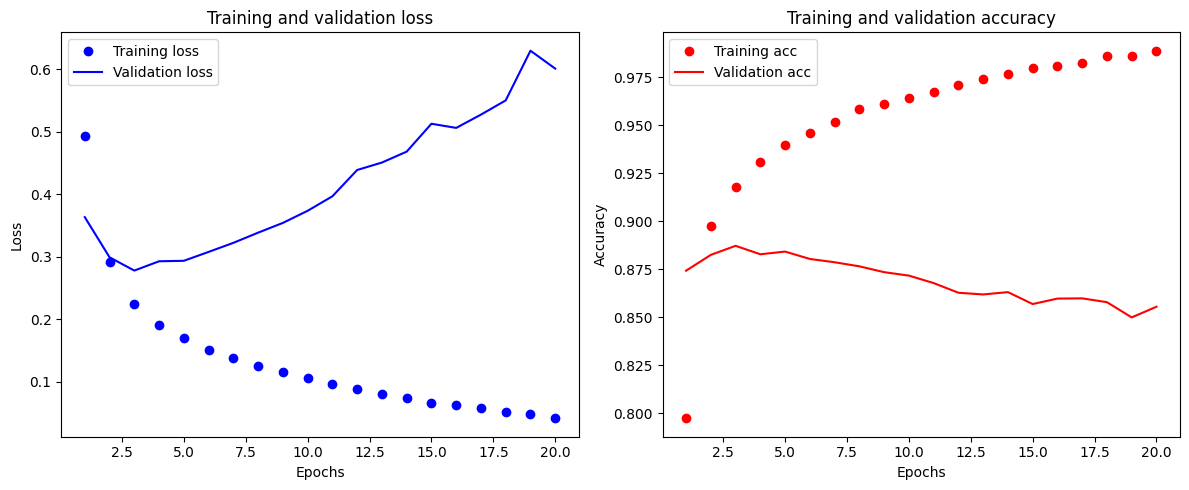

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

# Courbe des pertes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe des précisions
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Recommençons avec 4 époques par exemple (selon les graphes observés)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7528 - loss: 0.5622
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8990 - loss: 0.2983
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9194 - loss: 0.2263
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9357 - loss: 0.1844


In [14]:
results = model.evaluate(X_test, y_test)
print(f"\n🔎 Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8820 - loss: 0.2859

🔎 Test Loss: 0.2855, Test Accuracy: 88.48%
